# Linear Regression - Group Project

This is expected to develop linear regression models to predict students' grade, absences and failures using the combination of weekend and workday alcohol consumption with the same training(70%) and testing(30%) data size. And then respecticely visualize each of the prediction and conduct analysis.


### Import Libraries

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(123)

In [2]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression

# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

from sklearn.metrics import mean_squared_error

Load data and examine their main characteristic

In [3]:
import pandas as pd
file_name = "result_mat(2).csv"
df_data = pd.read_csv(file_name, sep=',')
print(df_data.shape)

(395, 61)


In [4]:
df_data.head(2).append(df_data.tail(2))

/var/folders/n7/x31jsyz93knbl2v5x8n69_980000gn/T/ipykernel_41851/768104290.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data.head(2).append(df_data.tail(2))


,Unnamed: 0,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Finalc
0,0,1,0,1,0,0,1,1,0,1,...,3,4,1,1,3,6,5,6,6,2
1,1,1,0,1,0,0,1,1,0,0,...,3,3,1,1,3,4,5,5,6,2
393,393,0,1,0,1,1,0,0,1,0,...,4,1,3,4,5,0,11,12,10,7
394,394,0,1,0,1,0,1,0,1,0,...,2,3,3,3,5,5,8,9,9,6


Here, we will focus on prediction of G3. Filter out grades that were 0

In [5]:
df_data.rename(columns={'G3': 'Grade'}, inplace=True)
df_data = df_data[~(df_data['Grade']==0)] # delete the rows with Grade 0
print(df_data.shape)
df_data.head(2).append(df_data.tail(2))

(357, 61)


/var/folders/n7/x31jsyz93knbl2v5x8n69_980000gn/T/ipykernel_41851/1705270932.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data.head(2).append(df_data.tail(2))


,Unnamed: 0,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade,Finalc
0,0,1,0,1,0,0,1,1,0,1,...,3,4,1,1,3,6,5,6,6,2
1,1,1,0,1,0,0,1,1,0,0,...,3,3,1,1,3,4,5,5,6,2
393,393,0,1,0,1,1,0,0,1,0,...,4,1,3,4,5,0,11,12,10,7
394,394,0,1,0,1,0,1,0,1,0,...,2,3,3,3,5,5,8,9,9,6


In [6]:
df_data.columns

Index(['Unnamed: 0', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'Grade', 'Finalc'],
      dtype='object')

In [7]:
# one-hot vectors for df_data
df_used = pd.get_dummies(df_data)
df_used.columns

Index(['Unnamed: 0', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'Grade', 'Finalc'],
      dtype='object')

In [8]:
df_used.head(2).append(df_used.tail(2))

/var/folders/n7/x31jsyz93knbl2v5x8n69_980000gn/T/ipykernel_41851/3661735764.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_used.head(2).append(df_used.tail(2))


,Unnamed: 0,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade,Finalc
0,0,1,0,1,0,0,1,1,0,1,...,3,4,1,1,3,6,5,6,6,2
1,1,1,0,1,0,0,1,1,0,0,...,3,3,1,1,3,4,5,5,6,2
393,393,0,1,0,1,1,0,0,1,0,...,4,1,3,4,5,0,11,12,10,7
394,394,0,1,0,1,0,1,0,1,0,...,2,3,3,3,5,5,8,9,9,6


## Split dataframe into features dataframe and target dataframe

In [9]:
df_X = df_used.drop(columns=['Finalc'])
df_y = df_used[['Finalc']]

In [10]:
df_X.columns

Index(['Unnamed: 0', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'Grade'],
      dtype='object')

In [11]:
df_y.columns

Index(['Finalc'], dtype='object')

## Build a linear regression model to predict the students' alcohol consumption using 'G3'

In [12]:
X_train = train_df_data = pd.read_csv("training_data.csv", sep=',', index_col=None)
X_test = test_df_data = pd.read_csv("testing_data.csv", sep=',', index_col=None)


Y_train = pd.read_csv("training_data.csv", sep=',', index_col=None)
Y_test = pd.read_csv("testing_data.csv", sep=',', index_col=None)


In [13]:
X_train=train_df_data[['G3']]
Y_train=train_df_data['Finalc']


X_test=test_df_data[['G3']]
Y_test=test_df_data['Finalc']

In [14]:
feature_train = X_train[['G3']]

In [15]:
feature_train.head()

,G3
0,12
1,9
2,13
3,4
4,8


In [16]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - Y_test))
rmse = np.sqrt(np.mean((predictions - Y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse)    

Using Linear Regression, MAE is 1.64
Using Linear Regression, RMSE is 1.93


In [18]:
print(mean_squared_error(predictions, Y_test))

3.741510263780925


## Build a linear regression model to predict the students' Alcohol Consumption using 'absences' 

In [19]:
X_train=train_df_data[['absences']]
Y_train=train_df_data['Finalc']


X_test=test_df_data[['absences']]
Y_test=test_df_data['Finalc']

In [20]:
feature_train = X_train[['absences']]

In [21]:
feature_train.head()

,absences
0,0
1,28
2,0
3,22
4,10


In [22]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [23]:
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - Y_test))
rmse = np.sqrt(np.mean((predictions - Y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse)   

Using Linear Regression, MAE is 1.64
Using Linear Regression, RMSE is 1.98


In [24]:
print(mean_squared_error(predictions, Y_test))

3.901869814853767


## Build a linear regression model to predict the students' Alcohol Consumption using 'failures' 

In [25]:
X_train=train_df_data[['failures']]
Y_train=train_df_data['Finalc']


X_test=test_df_data[['failures']]
Y_test=test_df_data['Finalc']

In [26]:
feature_train = X_train[['failures']]

In [27]:
feature_train.head()

,failures
0,0
1,1
2,0
3,2
4,0


In [28]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [29]:
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - Y_test))
rmse = np.sqrt(np.mean((predictions - Y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse) 

Using Linear Regression, MAE is 1.63
Using Linear Regression, RMSE is 1.94


In [30]:
print(mean_squared_error(predictions, Y_test))

3.768954653072886


## Build a linear regression model to predict the students' Alcohol Consumption using 'absences' , 'G3', 'failures'

In [31]:
X_train=train_df_data[['G3','absences','failures']]
Y_train=train_df_data['Finalc']


X_test=test_df_data[['G3','absences','failures']]
Y_test=test_df_data['Finalc']

In [32]:
feature_train = X_train[['G3','absences','failures']]

In [33]:
feature_train.head()

,G3,absences,failures
0,12,0,0
1,9,28,1
2,13,0,0
3,4,22,2
4,8,10,0


In [34]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [35]:
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - Y_test))
rmse = np.sqrt(np.mean((predictions - Y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse) 

Using Linear Regression, MAE is 1.63
Using Linear Regression, RMSE is 1.99


In [36]:
print(mean_squared_error(predictions, Y_test))

3.962625532985422


#### The MAE and RMSE on testing data are respectively 2.30 and 2.87
#### The MAE and RMSE on training data are respectively 2.31 and 2.84

## Visualization

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from sklearn import datasets, linear_model

In [38]:
Student = pd.read_csv("result_mat(2).csv", header=0) # the first line of data is header

In [39]:
type(Student)

pandas.core.frame.DataFrame

In [40]:
Student.head()

,Unnamed: 0,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Finalc
0,0,1,0,1,0,0,1,1,0,1,...,3,4,1,1,3,6,5,6,6,2
1,1,1,0,1,0,0,1,1,0,0,...,3,3,1,1,3,4,5,5,6,2
2,2,1,0,1,0,0,1,0,1,0,...,3,2,2,3,3,10,7,8,10,5
3,3,1,0,1,0,0,1,1,0,0,...,2,2,1,1,5,2,15,14,15,2
4,4,1,0,1,0,0,1,1,0,0,...,3,2,1,2,5,4,6,10,10,3


In [41]:
Student.isnull().sum()

Unnamed: 0    0
school_GP     0
school_MS     0
sex_F         0
sex_M         0
             ..
absences      0
G1            0
G2            0
G3            0
Finalc        0
Length: 61, dtype: int64

In [42]:
Student.shape

(395, 61)

In [43]:
Student.describe()

,Unnamed: 0,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Finalc
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,197.000000,0.883544,0.116456,0.526582,0.473418,0.222785,0.777215,0.711392,0.288608,0.103797,...,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,3.772152
std,114.170924,0.321177,0.321177,0.499926,0.499926,0.416643,0.416643,0.453690,0.453690,0.305384,...,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,1.984389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000
25%,98.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,2.000000
50%,197.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,3.000000
75%,295.500000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,5.000000
max,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,10.000000


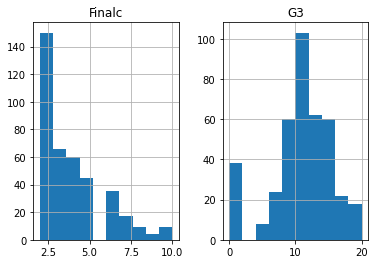

In [44]:
Student.hist(column = ['Finalc','G3'])
plt.show()

In [45]:
from sklearn import linear_model

x = Student[['G3']].values
y = Student['Finalc'].values

regr = linear_model.LinearRegression()
regr.fit(x,y)
#regr.predict(x_0)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [-0.02522796]
Intercept: 4.034905868890539


In [46]:
from sklearn import metrics

y_pred = regr.predict(x)
#print(metrics.explained_variance_score(y, y_pred))
print(metrics.mean_absolute_error(y, y_pred))
print(metrics.mean_squared_error(y, y_pred))

1.5985575804646337
3.914507059774116


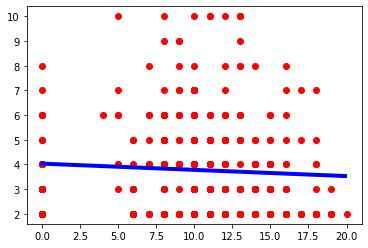

In [47]:
plt.scatter(x, y, color = 'red')
lx = np.arange(min(x), max(x), (max(x)-min(x))/200).reshape(200, 1)
plt.plot(lx, regr.predict(lx), color = 'blue', linewidth = 4)
plt.show()

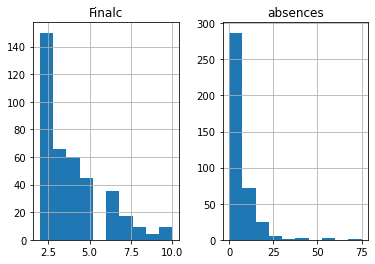

In [48]:
Student.hist(column = ['Finalc','absences'])
plt.show()

In [49]:
from sklearn import linear_model

x = Student[['absences']].values
y = Student['Finalc'].values



regr = linear_model.LinearRegression()
regr.fit(x,y)
#regr.predict(x_0)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [0.03438794]
Intercept: 3.575835947524235


In [50]:
from sklearn import metrics

y_pred = regr.predict(x)
#print(metrics.explained_variance_score(y, y_pred))
print(metrics.mean_absolute_error(y, y_pred))
print(metrics.mean_squared_error(y, y_pred))

1.5790975241518022
3.8522833041537594


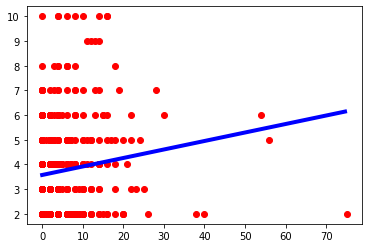

In [51]:
plt.scatter(x, y, color = 'red')
lx = np.arange(min(x), max(x), (max(x)-min(x))/200).reshape(200, 1)
plt.plot(lx, regr.predict(lx), color = 'blue', linewidth = 4)
plt.show()

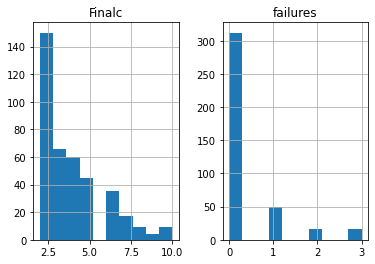

In [52]:
Student.hist(column = ['Finalc','failures'])
plt.show()

In [53]:
from sklearn import linear_model

x = Student[['failures']].values
y = Student['Finalc'].values

regr = linear_model.LinearRegression()
regr.fit(x,y)
#regr.predict(x_0)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [0.40881417]
Intercept: 3.6355355192526666


In [54]:
from sklearn import metrics

y_pred = regr.predict(x)
#print(metrics.explained_variance_score(y, y_pred))
print(metrics.mean_absolute_error(y, y_pred))
print(metrics.mean_squared_error(y, y_pred))

1.5756910136965832
3.835640913787976


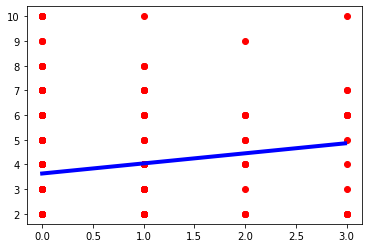

In [55]:
plt.scatter(x, y, color = 'red')
lx = np.arange(min(x), max(x), (max(x)-min(x))/200).reshape(200, 1)
plt.plot(lx, regr.predict(lx), color = 'blue', linewidth = 4)
plt.show()